In [ ]:
#! pip install nbimporter

In [ ]:
import dvats.mplots as mp
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

In [ ]:
taxi_df = pd.read_csv("https://zenodo.org/record/4276428/files/STUMPY_Basics_Taxi.csv?download=1")
taxi_df['value'] = taxi_df['value'].astype(np.float64)
taxi_df['timestamp'] = pd.to_datetime(taxi_df['timestamp'])
taxi_df.head()

,timestamp,value
0,2014-10-01 00:00:00,12751.0
1,2014-10-01 00:30:00,8767.0
2,2014-10-01 01:00:00,7005.0
3,2014-10-01 01:30:00,5257.0
4,2014-10-01 02:00:00,4189.0


In [ ]:
DAY_MULTIPLIER = 7  # Specify for the amount of days you want between each labeled x-axis tick
x_axis_labels = taxi_df[
        (taxi_df.timestamp.dt.hour==0)
    ]['timestamp'].dt.strftime('%b %d').values[::DAY_MULTIPLIER]

x_axis_labels[1::2] = " "
x_axis_labels, DAY_MULTIPLIER
x_axis_labels.shape

(22,)

In [ ]:
def plot_taxi(taxi_df):
    # This code is going to be utilized to control the axis labeling of the plots
    plt.suptitle('Taxi Passenger Raw Data', fontsize='30')
    plt.xlabel('Window Start Date', fontsize ='20')
    plt.ylabel('Half-Hourly Average\nNumber of Taxi Passengers', fontsize='20')
    plt.plot(taxi_df['value'])

    plt.xticks(np.arange(0, taxi_df['value'].shape[0], (48*DAY_MULTIPLIER)/2), x_axis_labels)
    plt.xticks(rotation=75)
    plt.minorticks_on()
    plt.margins(x=0)
    plt.show()

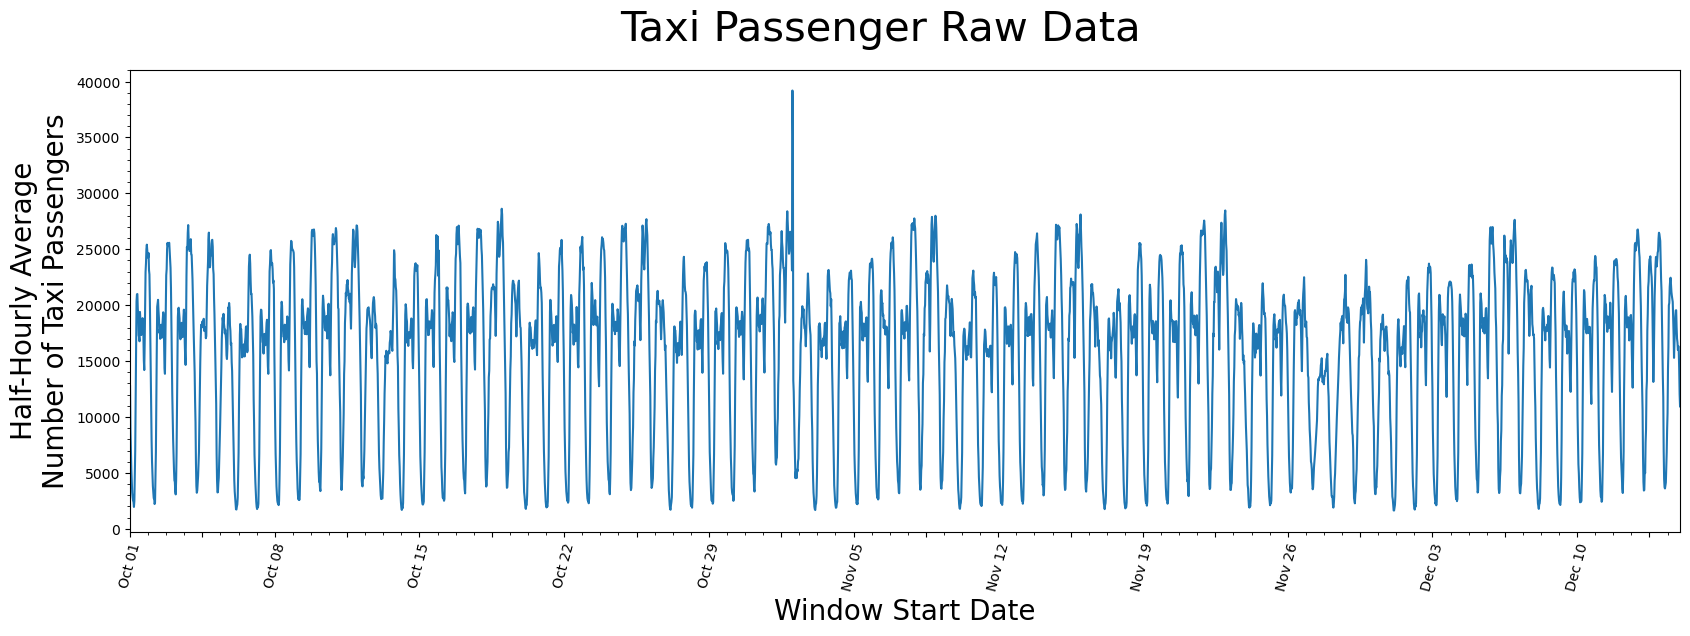

In [ ]:
%matplotlib inline 
plot_taxi(taxi_df)

In [ ]:
data = taxi_df['value']
dominant_period_sizes = mp.find_dominant_window_sizes_list(
    data, 
    offset = 0.05,
    nsizes = 5,
    print_flag = True
)

-----> Find dominant_window_sizes_list -----
    X ~  3600
    Looking for - at most - the best 5 window sizes
    Offset 0.05 max size: 180.0
    Sizes: [24, 12, 12, 20, 28]
----- Find dominant_window_sizes_list ----->


In [ ]:
dominant_period_sizes

[24, 12, 12, 20, 28]

In [ ]:
MP = mp.MatrixProfile(
    data            = taxi_df['value'],
    self_join       = True,
    subsequence_len = 48 #dominant_period_sizes[0]
)

In [ ]:
MP.compute(
    'stump',
    time_flag = True
)

array([0.462536418269528, 0.46541273053122834, 0.4671042351442861, ...,
       0.803790410456576, 0.8152584154200978, 0.8293360140041167],
      dtype=object)

In [ ]:
def stumpy_summary_plot(mp, m):
    plt.suptitle('1-Day STUMP', fontsize='30')
    plt.xlabel('Window Start', fontsize ='20')
    plt.ylabel('Matrix Profile', fontsize='20')
    plt.plot(mp)

    plt.plot(575, 1.7, marker="v", markersize=15, color='b')
    plt.text(620, 1.6, 'Columbus Day', color="black", fontsize=20)
    plt.plot(1535, 3.7, marker="v", markersize=15, color='b')
    plt.text(1580, 3.6, 'Daylight Savings', color="black", fontsize=20)
    plt.plot(2700, 3.1, marker="v", markersize=15, color='b')
    plt.text(2745, 3.0, 'Thanksgiving', color="black", fontsize=20)
    plt.plot(30, .2, marker="^", markersize=15, color='b', fillstyle='none')
    plt.plot(363, .2, marker="^", markersize=15, color='b', fillstyle='none')
    plt.xticks(np.arange(0, 3553, (m*DAY_MULTIPLIER)/2), x_axis_labels)
    plt.xticks(rotation=75)
    plt.minorticks_on()
    plt.show()

In [ ]:
MP.distances

array([0.462536418269528, 0.46541273053122834, 0.4671042351442861, ...,
       0.803790410456576, 0.8152584154200978, 0.8293360140041167],
      dtype=object)

In [ ]:
x_axis_labels.shape

(22,)

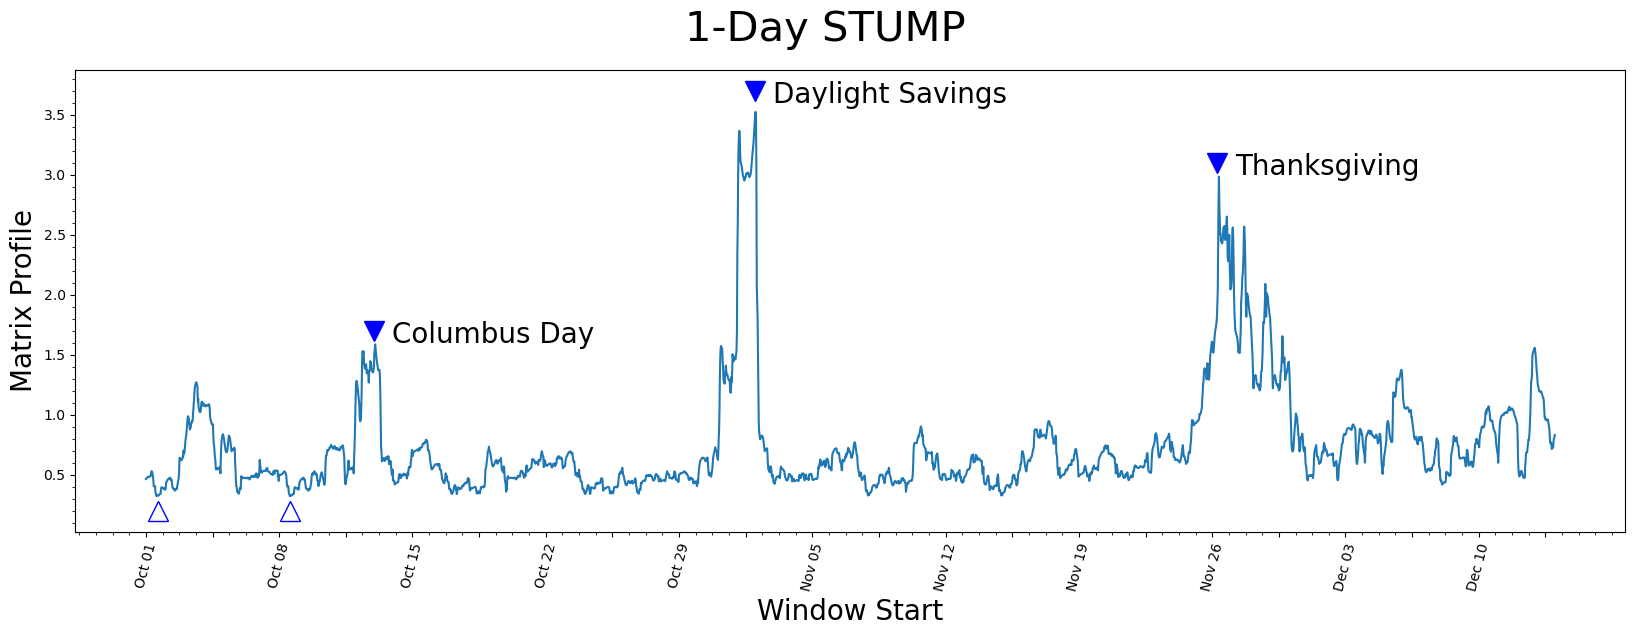

In [ ]:
stumpy_summary_plot(MP.distances, MP.subsequence_len)

In [ ]:
MPS = mp.MatrixProfiles(
    data = taxi_df['value'],
    subsequence_len = 48
)
MPS.compute('stump_gpu', time_flag = True, print_flag = False)

MatrixProfile(data=0       12751.0
1        8767.0
2        7005.0
3        5257.0
4        4189.0
         ...   
3595    16344.0
3596    15913.0
3597    14327.0
3598    12060.0
3599    10952.0
Name: value, Length: 3600, dtype: float64, data_b=None, self_join=True, distances=array([0.4625364182695856, 0.4654127305312627, 0.46710423514429755, ...,
       0.8037904104569009, 0.8152584154203724, 0.8293360140038725],
      dtype=object), computation_time=1.283029317855835, subsequence_len=48, method='stump_gpu', current_index_pos_plot=0, index=array([1680, 1681, 1682, ..., 3214, 3215, 2208], dtype=object), index_left=array([-1, -1, -1, ..., 3214, 3215, 2208], dtype=object), index_right=array([1680, 1681, 1682, ..., -1, -1, -1], dtype=object), motif_idx=0, motif_nearest_neighbor_idx=0, motif_nearest_neighbor_idx_left=0, motif_nearest_neighbor_idx_right=0, discord_idx=0, discord_nearest_neighbor_idx=0, discord_nearest_neighbor_idx_left=0, discord_nearest_neighbor_idx_right=0)

In [ ]:

for i in range(len(dominant_period_sizes)):
    MPS.subsequence_len = dominant_period_sizes[i]
    MPS.compute('stump_gpu', time_flag = True, print_flag = False)

In [ ]:
len(range(len(MPS.matrix_profiles)))

6

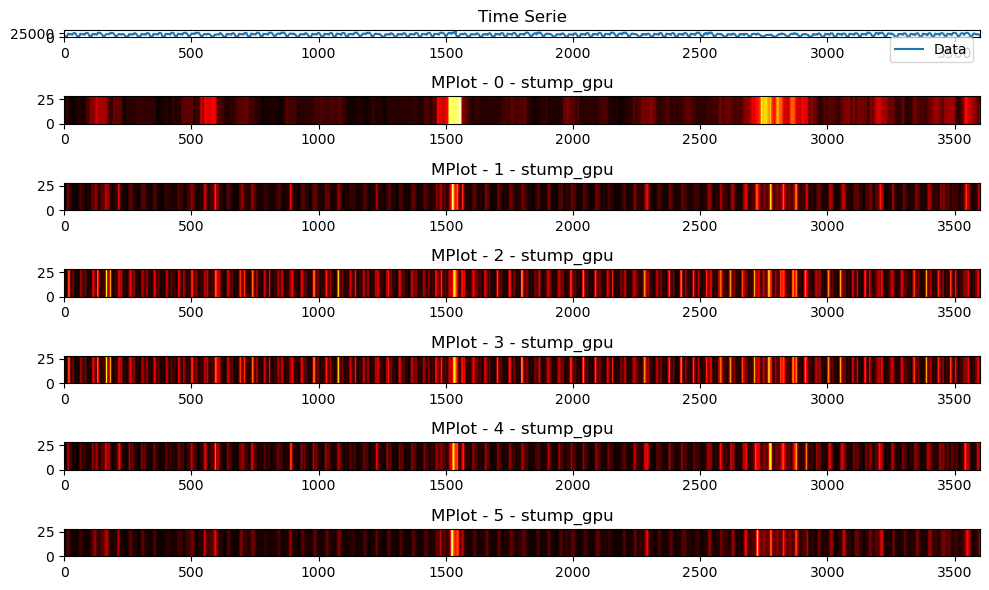

In [ ]:

MPS.plot()

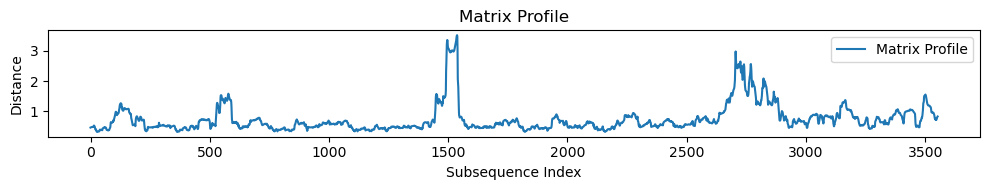

In [ ]:
for i in range (len (MPS.matrix_profiles)):
    MPS.matrix_profiles[i].plot(
        plot_ts = False, 
        figsize = (10,2),
        mp_title = f"Matrix Profile | m = {MPS.matrix_profiles[i].subsequence_len}",  
    )